In [55]:
import tensorflow as tf 

In [56]:

mnist = tf.keras.datasets.mnist

In [57]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [58]:
x_train.shape

(60000, 28, 28)

In [59]:
import matplotlib.pyplot as plt

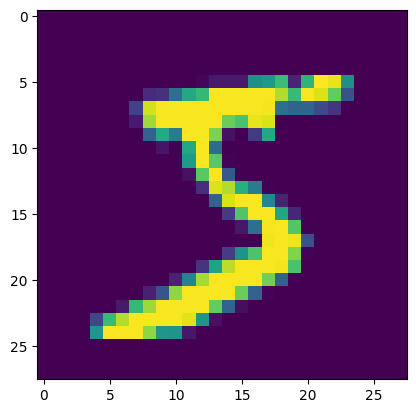

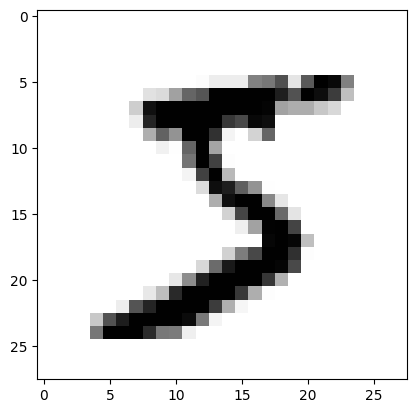

In [60]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [61]:
print (x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

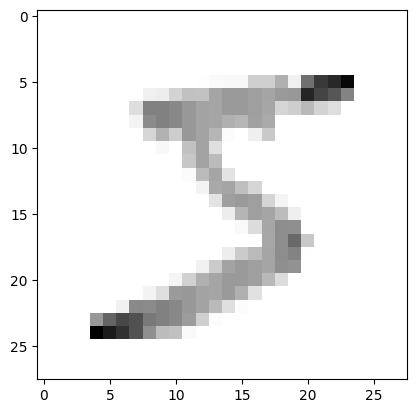

In [62]:
x_train = tf.keras.utils.normalize (x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [63]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [64]:
print (y_train[0])

5


In [65]:
import numpy as np # pip install numpy 
ImageSize = 28
x_trainr = np.array(x_train).reshape(-1, ImageSize, ImageSize,1) ## increasing one dimension for kernel operation
x_testr = np.array(x_test).reshape(-1, ImageSize, ImageSize,1) ## increasing one dimension for kernel operation
print ("Training Samples dimension",x_trainr.shape)
print ("Testing Sapmles dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Sapmles dimension (10000, 28, 28, 1)


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [67]:
ModelShow = Sequential()

### First Convolution Layer 0 1 2 3 (60000,28,28,1) 28-3+1 = 26*26
ModelShow.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) ### only for the first convolution layer to mention input layer size
ModelShow.add(Activation("relu"))## activation function to make it non-linear, <0, remove, >0
ModelShow.add(MaxPooling2D(pool_size=(2,2)))## MaxPooling single maximum value of 2x2

### Second Convolution Layer
ModelShow.add(Conv2D(64, (3,3)))## Second Convolution Layer
ModelShow.add(Activation("relu"))## activation function
ModelShow.add(MaxPooling2D(pool_size=(2,2)))## MaxPooling

### Third Convolution Layer
ModelShow.add(Conv2D(64, (3,3)))## Third Convolution Layer 24
ModelShow.add(Activation("relu"))## activation function
ModelShow.add(MaxPooling2D(pool_size=(2,2)))## MaxPooling

### Fully Connected Layer # 1 20x20 = 400
ModelShow.add (Flatten()) ### before using fully connected layer, need to be flatten so that 2D to
ModelShow.add (Dense(64)) 
ModelShow.add(Activation("relu"))

### Fully Connected Layer #
ModelShow.add (Dense(32))
ModelShow.add(Activation("relu"))

### Last Fully Connected Layer, output must be equal to number of classes, 10 (0-9)
ModelShow.add(Dense(10))## this last dense must be equal to 10
ModelShow.add(Activation('softmax'))

In [68]:
ModelShow.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_6 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_7 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [69]:
print(" This Is Show That Total Training Samples = ",len(x_trainr))

 This Is Show That Total Training Samples =  60000


In [70]:
ModelShow.compile(loss ="sparse_categorical_crossentropy", optimizer ="adam", metrics=['accuracy'])

In [71]:
ModelShow.fit (x_trainr,y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 43s 32ms/step - loss: 0.3547 - accuracy: 0.8869 - val_loss: 0.1497 - val_accuracy: 0.9541
Epoch 2/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.1179 - accuracy: 0.9642 - val_loss: 0.1186 - val_accuracy: 0.9631
Epoch 3/5
1313/1313 [==============================] - 45s 35ms/step - loss: 0.0844 - accuracy: 0.9737 - val_loss: 0.0910 - val_accuracy: 0.9704
Epoch 4/5
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0676 - accuracy: 0.9795 - val_loss: 0.0804 - val_accuracy: 0.9753
Epoch 5/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0545 - accuracy: 0.9826 - val_loss: 0.0772 - val_accuracy: 0.9765


In [72]:
test_loss, test_acc = ModelShow.evaluate(x_testr, y_test)
print ("Test Loss on 10,000 test samples",test_loss)
print ("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 0.0735 - accuracy: 0.9783
Test Loss on 10,000 test samples 0.0734698623418808
Validation Accuracy on 10,000 test samples 0.9782999753952026


In [73]:
predictions = ModelShow.predict([x_testr])

313/313 [==============================] - 3s 9ms/step


In [74]:
print(predictions)

[[2.30849423e-06 7.18200827e-05 1.60530112e-06 ... 9.99909520e-01
  1.71013834e-08 1.31789375e-05]
 [1.02333406e-05 6.10315192e-06 9.99667287e-01 ... 3.66693189e-06
  4.02871447e-05 8.47190131e-06]
 [1.07519909e-07 9.99997735e-01 1.53088223e-07 ... 5.99468919e-08
  1.31908763e-07 8.47096317e-07]
 ...
 [5.77617842e-10 4.18289972e-08 1.03566811e-06 ... 2.54260726e-07
  9.17493310e-07 4.93974949e-05]
 [1.36009912e-05 9.07114099e-08 2.74366797e-11 ... 3.56997959e-10
  6.26819747e-05 7.93949221e-05]
 [3.34850374e-05 1.55658417e-05 8.73413155e-05 ... 4.78315023e-08
  8.53178135e-05 2.04157608e-04]]


In [75]:
print(np.argmax(predictions[1]))

2


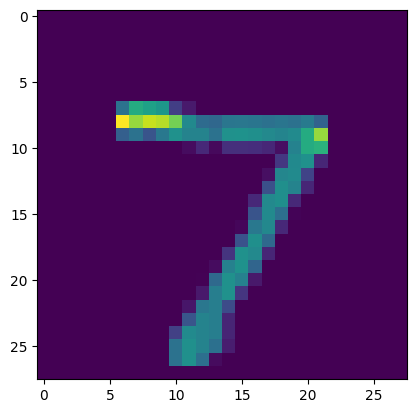

In [76]:
plt.imshow(x_test[0])

In [77]:
print(np.argmax(predictions[128]))

8


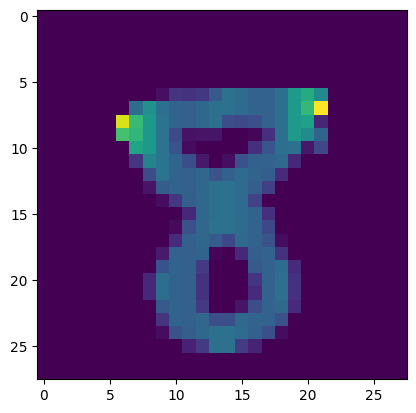

In [78]:
plt.imshow(x_test[128])

In [79]:
import cv2

In [80]:
img = cv2.imread('D:/Desktop/six.png')

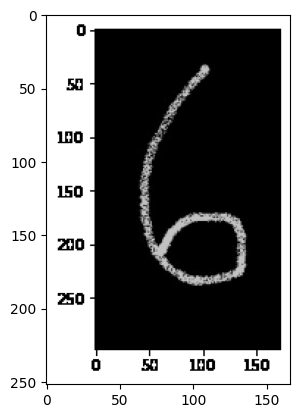

In [81]:
plt.imshow(img)

In [82]:
img.shape

(252, 166, 3)

In [83]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [84]:
gray.shape

(252, 166)

In [85]:
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [86]:
resized.shape

(28, 28)

In [87]:
newimg = tf.keras.utils.normalize (resized, axis = 1)

In [88]:
newimg = np.array(newimg).reshape(-1, ImageSize, ImageSize,1)

In [89]:
newimg.shape

(1, 28, 28, 1)

In [90]:
predictions = ModelShow.predict(newimg)

1/1 [==============================] - 0s 50ms/step


In [91]:
print(np.argmax(predictions))

6
